In [1]:
import sys
sys.path.append("..")
import logging
import random
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from federated_learning.FLCustomDataset import FLCustomDataset
from federated_learning.helper import utils

In [2]:
CONFIG_PATH = '../configs/defaults.yml'
configs = utils.load_config(CONFIG_PATH)


In [3]:
train_data = utils.load_femnist_google_test(configs['data']['EMNIST_GOOGLE_PATH'])

In [26]:
key_lists = list(train_data.keys())
print("Total Users: {}".format(len(key_lists)))

numbers = dict()
for a, b in train_data.items():
    # numbers[num_images] = num_users
#     print("[{}]: Images: {}".format(a, len(b['x'])))
    images_num = b['x'].shape[0]
    if images_num not in numbers:
        numbers[images_num] = 1
    else:
        numbers[images_num] += 1

print("Mean num of samples/user: {}".format(np.mean(list(numbers.keys()))))
# print(b.keys())
# print(b['x'].shape, b['y'].shape)


Total Users: 3383
Mean num of samples/user: 8.571428571428571


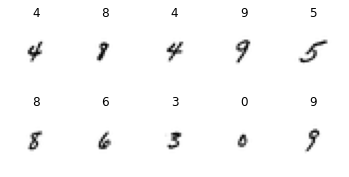

In [37]:
figure = plt.figure(figsize=(6,3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.title(train_data[key_lists[0]]['y'][i])
    plt.imshow(train_data[key_lists[0]]['x'][i], cmap='gray')

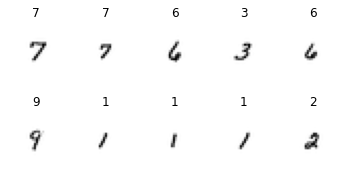

In [38]:
figure = plt.figure(figsize=(6,3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.axis("off")
    plt.title(train_data[key_lists[1]]['y'][i])
    plt.imshow(train_data[key_lists[1]]['x'][i], cmap='gray')